In [13]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

# Problème de régression : modèle de régression linéaire

In [14]:
x, y = make_regression(n_samples = 100, n_features = 1, noise = 10)

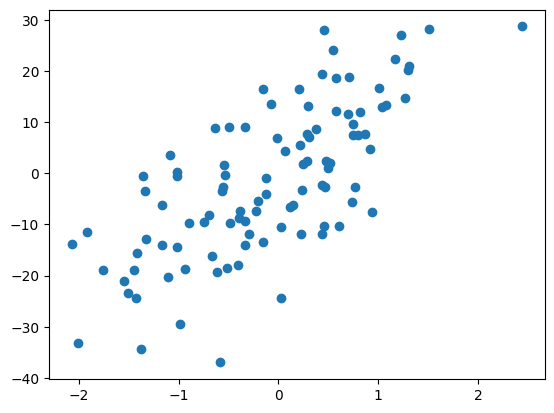

In [15]:
plt.scatter(x,y)
plt.show()

In [16]:
from sklearn.linear_model import LinearRegression

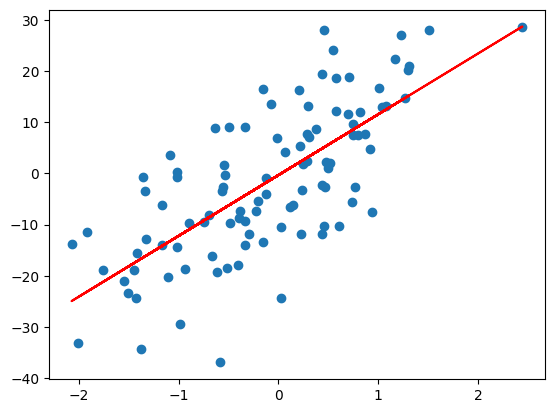

In [17]:
model = LinearRegression()
model.fit(x,y)

y_pred = model.predict(x)

plt.scatter(x,y)
plt.plot(x,y_pred, c='r')

In [18]:
model.score(x,y)

0.5189315736227893

# Problème de classification : modèle de régression logistique

In [19]:
from sklearn.datasets import make_classification
x, y = make_classification(n_samples=100, n_features=1, n_redundant=0, n_informative=1, n_clusters_per_class=1)

[[ 0.05118144]
 [-1.44620269]
 [-0.90218103]
 [ 0.89115907]
 [ 0.9922533 ]
 [ 1.03256654]
 [-1.53208059]
 [ 0.93118983]
 [-0.5806296 ]
 [-1.69796185]
 [ 0.89919182]
 [-0.81540087]
 [ 1.0504777 ]
 [ 0.85726056]
 [-0.58413576]
 [-0.30331932]
 [ 0.97988577]
 [-1.13294932]
 [ 1.07058383]
 [-0.99522074]
 [ 0.82319593]
 [-1.05895818]
 [ 1.04769521]
 [ 0.99174447]
 [ 1.05800537]
 [ 1.04910658]
 [-1.03383499]
 [ 0.87686515]
 [ 1.11885674]
 [ 0.94159263]
 [-2.81873185]
 [-0.72854929]
 [-1.12953473]
 [ 0.07519244]
 [ 1.22378462]
 [ 1.02845037]
 [-0.78514205]
 [ 0.82139731]
 [-1.74110507]
 [ 0.97012424]
 [ 1.26755048]
 [-1.10792536]
 [-1.31090086]
 [-1.59893115]
 [ 1.08887816]
 [ 1.20247582]
 [ 0.92884019]
 [ 0.79589008]
 [-0.54776324]
 [ 1.20211537]
 [-0.97694833]
 [ 1.08753512]
 [ 0.95448904]
 [-1.47883054]
 [-1.24847016]
 [-1.24037342]
 [ 1.11423856]
 [ 1.12858784]
 [-0.39764969]
 [-0.35296001]
 [-0.89660018]
 [-1.6654951 ]
 [ 0.8422785 ]
 [ 0.99442569]
 [-0.83530097]
 [ 0.06351519]
 [-0.70538

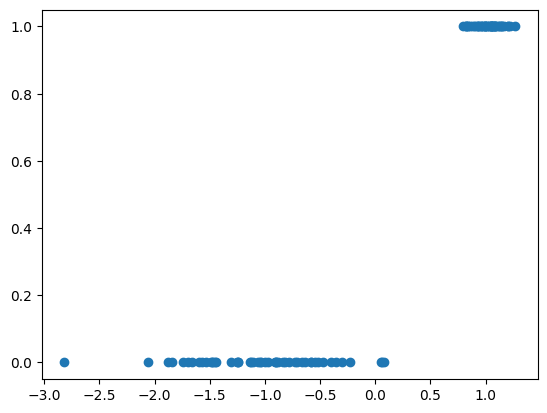

In [20]:
plt.scatter(x,y)
print(x)

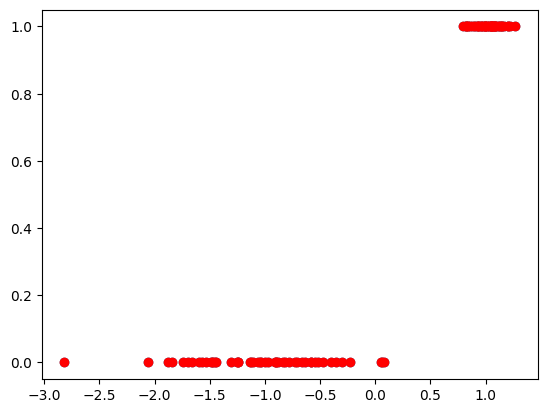

In [21]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x,y)
y_pred = model.predict(x)

plt.scatter(x,y)
plt.scatter(x,y_pred, c='r')

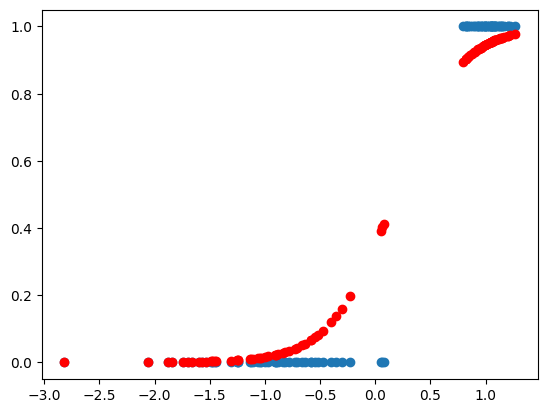

In [22]:
y_pred = model.predict_proba(x)[:,1]

plt.scatter(x,y)
plt.scatter(x,y_pred, c='r')

In [23]:
model.score(x,y)

1.0

# Exemples sur des Datasets plus concrets

## Problème de régression : prix des appartements

In [24]:
import pandas as pd
df = pd.read_csv("53.csv")
df.head()

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,...,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude
0,2022-694266,2022-01-04,1,Vente,130000.0,1.0,NaN,RUE DU CLOSEAU,0116,53320.0,...,Maison,75.0,4.0,S,sols,NaN,NaN,764.0,-0.952246,48.057546
1,2022-694267,2022-01-06,1,Vente,5500.0,NaN,NaN,LA CROIX GUILLAUME,B218,53140.0,...,NaN,NaN,NaN,BT,taillis simples,NaN,NaN,6730.0,-0.249851,48.505845
2,2022-694267,2022-01-06,1,Vente,5500.0,NaN,NaN,HAUT DE LA NOE,B350,53140.0,...,NaN,NaN,NaN,BT,taillis simples,NaN,NaN,5058.0,-0.251471,48.505753
3,2022-694268,2022-01-03,1,Vente,NaN,NaN,NaN,LE PETIT PRE PRE EN PAIL,C040,53140.0,...,NaN,NaN,NaN,P,prés,NaN,NaN,1123.0,-0.194389,48.457387
4,2022-694269,2022-01-04,1,Vente,1142500.0,22.0,NaN,BD LOUIS ARMAND,0970,53940.0,...,Local industriel. commercial ou assimilé,1000.0,0.0,NaN,NaN,NaN,NaN,NaN,-0.813043,48.065453


In [25]:
df = df[(df.nature_mutation == 'Vente')]
df = df[df.type_local == 'Maison']

In [26]:
df = df.loc[:,['valeur_fonciere','surface_reelle_bati']]
df.head()

,valeur_fonciere,surface_reelle_bati
0,130000.0,75.0
10,32000.0,27.0
11,127000.0,110.0
17,112000.0,105.0
18,112000.0,105.0


In [27]:
df.describe()

,valeur_fonciere,surface_reelle_bati
count,5.332000e+03,5334.000000
mean,1.616102e+05,98.633671
std,2.241469e+05,43.782375
min,2.756000e+01,1.000000
25%,8.000000e+04,71.000000
50%,1.350000e+05,90.000000
75%,1.996000e+05,120.000000
max,3.865570e+06,493.000000


In [28]:
df.dropna(axis = 0, inplace = True)
df.head()

,valeur_fonciere,surface_reelle_bati
0,130000.0,75.0
10,32000.0,27.0
11,127000.0,110.0
17,112000.0,105.0
18,112000.0,105.0


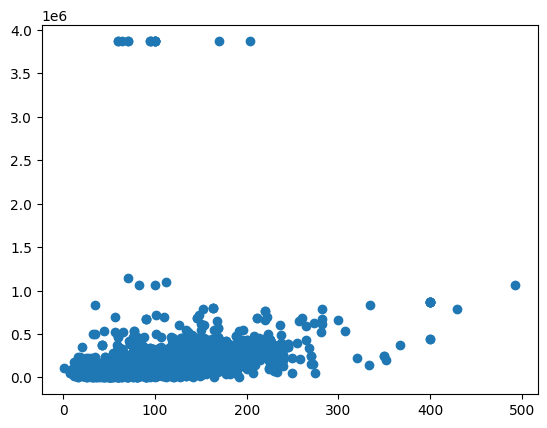

In [29]:
plt.scatter(df.surface_reelle_bati,df.valeur_fonciere)

In [30]:
df.drop(df[df.valeur_fonciere > 2000000].index, inplace=True)

In [31]:
# target
y = df.valeur_fonciere

# Features
X = df.surface_reelle_bati.values

In [32]:
X = X.reshape(5317,1)
print(X.shape)
print(y.shape)

(5317, 1)
(5317,)


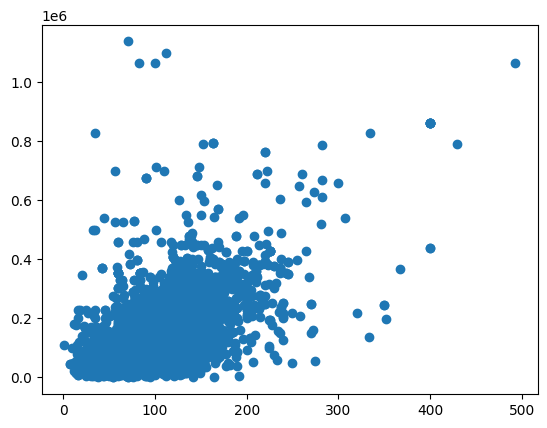

In [33]:
plt.scatter(X,y)

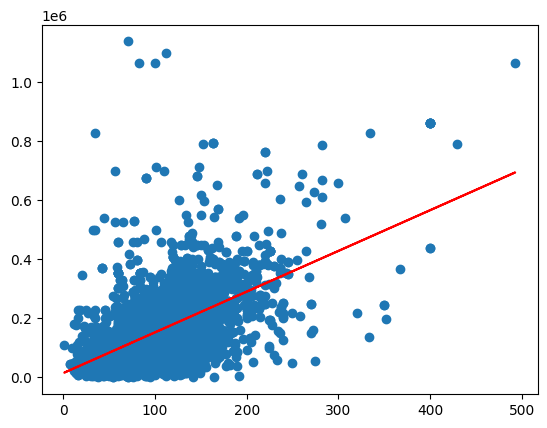

In [34]:
model = LinearRegression()
model.fit(X,y)

y_pred = model.predict(X)

plt.scatter(X,y)
plt.plot(X,y_pred, c='r')

In [35]:
print(model.predict([[150]]))

[221987.46026669]


In [36]:
model.score(X,y)

0.31555790383697946

## Problème de classification : naufrage du titanic

In [37]:

import seaborn as sns

In [38]:
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [39]:
titanic = titanic.loc[:,['survived','pclass','sex','age']]
titanic.dropna(axis = 0, inplace = True)
titanic['sex'].replace(['male','female'],[0,1],inplace=True)
titanic.head()

<ipython-input-39-9a9cd145e654>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['sex'].replace(['male','female'],[0,1],inplace=True)
<ipython-input-39-9a9cd145e654>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic['sex'].replace(['male','female'],[0,1],inplace=True)


,survived,pclass,sex,age
0,0,3,0,22.0
1,1,1,1,38.0
2,1,3,1,26.0
3,1,1,1,35.0
4,0,3,0,35.0


In [40]:
# target
y = titanic.survived

# Features
X = titanic.drop('survived', axis = 1).values

In [41]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X,y)

LogisticRegression()

In [42]:
y_pred = model.predict(X)

In [43]:
print(model.score(X,y))

0.7899159663865546


In [44]:
def survie(model, pclass, sex, age):
    X = np.array([pclass, sex, age]).reshape(1,3)
    print(model.predict(X))
    print(model.predict_proba(X))


In [45]:
survie(model, pclass=1, sex=0, age=20)

[1]
[[0.37804431 0.62195569]]
